### **1. Importações**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn

bibliotecas = {
    "Pandas": pd,
    "NumPy": np,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "Sklearn": sklearn,
}
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")
    
import matplotlib.pyplot as plt

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |     3.10.0
NumPy                |      2.2.1
Pandas               |      2.2.3
Seaborn              |     0.13.2
Sklearn              |      1.6.0


### **2. Análise inicial das colunas**

- Valores nulos, duplicados, tipos das colunas...

In [2]:
base = pd.read_csv("../data/train.csv")

with pd.option_context("display.max_columns", 50):
    display(base.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
base.isnull().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
base.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [6]:
base.duplicated().sum()

np.int64(0)

In [7]:
base.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Temos as seguintes situações:

- Temos registros de 2000 celulares
- As colunas são referentes a componentes dos celulares, como força da bateria, memória RAM e dual sim.
- A coluna "target" é: "price_range", que define um número de 0 a 3 (crescente) da classe na qual o celular se encaixa
- O objetivo é analisar o peso das colunas nessa target final, analisando os fatores de maior peso no preços finais
- Essa classe final pode ser utilizada em diversos contextos, como:
    - Recomendação de celulares especificos para clientes (de acordo com suas preferencias)
    - Organização e segmentação de celulares
    - Criação de comparativos

### **3. Entendendo as colunas**

In [8]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
base.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [10]:
with pd.option_context("display.max_columns", 50):
    display(base.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


#### **Descrições das colunas:**

Essas colunas parecem representar as características técnicas e funcionais de celulares em uma base de dados. Aqui está o que cada coluna provavelmente significa:

1. **`battery_power`**: Capacidade da bateria em mAh (miliampere-hora).
2. **`blue`**: Indica se o celular tem suporte para Bluetooth (1 = sim, 0 = não).
3. **`clock_speed`**: Velocidade do processador em GHz (gigahertz).
4. **`dual_sim`**: Indica se o celular suporta dois chips SIM (1 = sim, 0 = não).
5. **`fc`**: Resolução da câmera frontal em megapixels (MP).
6. **`four_g`**: Indica se o celular suporta tecnologia 4G (1 = sim, 0 = não).
7. **`int_memory`**: Capacidade de armazenamento interno em GB (gigabytes).
8. **`m_dep`**: Espessura do celular em cm (centímetros).
9. **`mobile_wt`**: Peso do celular em gramas (g).
10. **`n_cores`**: Número de núcleos do processador.
11. **`pc`**: Resolução da câmera principal (traseira) em megapixels (MP).
12. **`px_height`**: Altura da resolução da tela em pixels.
13. **`px_width`**: Largura da resolução da tela em pixels.
14. **`ram`**: Memória RAM em MB (megabytes).
15. **`sc_h`**: Altura do corpo do celular em cm (centímetros).
16. **`sc_w`**: Largura do corpo do celular em cm (centímetros).
17. **`talk_time`**: Tempo máximo de conversação com carga cheia, em horas.
18. **`three_g`**: Indica se o celular suporta tecnologia 3G (1 = sim, 0 = não).
19. **`touch_screen`**: Indica se o celular possui tela sensível ao toque (1 = sim, 0 = não).
20. **`wifi`**: Indica se o celular suporta conexão Wi-Fi (1 = sim, 0 = não).
21. **`price_range`**: Faixa de preço do celular, categorizada em diferentes níveis (geralmente de 0 a N, onde 0 é mais barato e N é mais caro).

Se precisar de ajuda para análise dessa base, como criação de clusters ou previsões, é só avisar!

### **4. Visualizações baseadas na coluna-alvo**

#### **4.1. battery_power - Força da bateria**

In [11]:
base.groupby('price_range')['battery_power'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,503,1116.902,1066.0,1994,410.801305
1,501,1228.868,1206.0,1996,438.614528
2,501,1228.320,1219.5,1998,452.863065
3,503,1379.984,1449.5,1994,414.992261


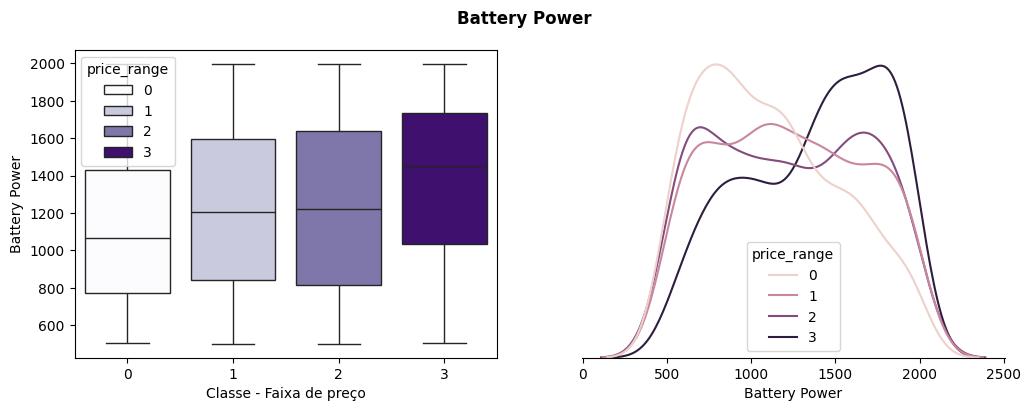

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
sns.boxplot(data=base, x='price_range', y='battery_power', hue='price_range', ax=ax[0], palette='Purples')
sns.kdeplot(data=base, x='battery_power', hue='price_range', ax=ax[1])
ax[0].set_xlabel("Classe - Faixa de preço")
ax[0].set_ylabel("Battery Power")
ax[1].set_xlabel("Battery Power")
ax[1].yaxis.set_visible(False)
plt.suptitle("Battery Power", fontweight='bold')

ax[1].spines[['top','left','right']].set_visible(False)
plt.savefig("../images/eda_batterypower.png")
plt.show()

Como podemos ver, conforme o número da classe aumenta, os quartis da coluna "Battery_power" também sobem, indicando uma correlação positiva

#### **4.2. blue - Bluetooth**

In [13]:
import sys
sys.path.append('../functions/')
from funcoes import plot_categorica
help(plot_categorica)

Help on function plot_categorica in module funcoes:

plot_categorica(df, coluna_analise, coluna_alvo, titulo, subtitulo, salvar=None)
    _summary_
    
    Args:
        df (_dataframe_): dataframe Pandas
        coluna_analise (_string_): nome da coluna categórica
        coluna_alvo (_string_): nome da coluna-alvo
        titulo (_string_): título do gráfico
        subtitulo (_string_): subtítulo do gráfico
        salvar (_string_): nome do arquivo para salvar



In [14]:
base.groupby("price_range")['blue'].value_counts()

price_range  blue
0            0       257
             1       243
1            0       255
             1       245
2            0       257
             1       243
3            1       259
             0       241
Name: count, dtype: int64

In [15]:
blue_0 = base.loc[base.blue == 0, ['blue','price_range']].copy()
blue_1 = base.loc[base.blue == 1, ['blue','price_range']].copy()

a_0 = blue_0.groupby("price_range")['blue'].value_counts()

ind = [tupla[0] for tupla in a_0.index]
np.array(ind)

array([0, 1, 2, 3])

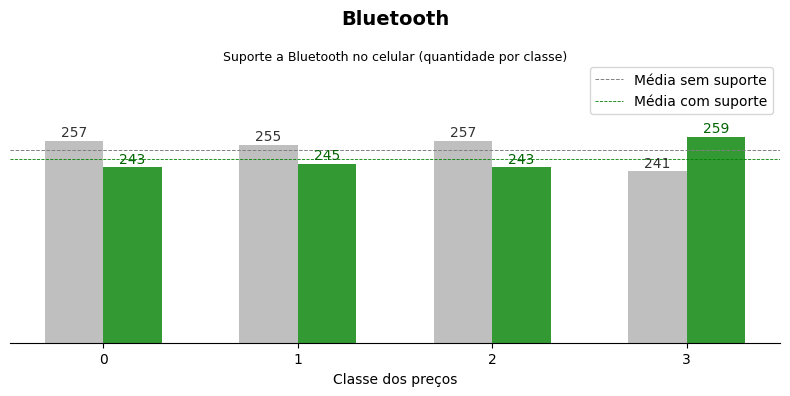

In [16]:
plot_categorica(base,
                'blue',
                'price_range',
                'Bluetooth',
                'Suporte a Bluetooth no celular (quantidade por classe)',
                salvar='bluetooth')

#### **4.3. clock_speed - Velocidade do processador em GHz**

In [17]:
base.groupby("price_range")['clock_speed'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,0.5,1.5502,1.55,3.0,0.848941
1,0.5,1.4886,1.50,3.0,0.814479
2,0.5,1.5298,1.50,3.0,0.804404
3,0.5,1.5204,1.50,3.0,0.796450


#### **4.4. dual_sim - Suporte a dois chips**

In [18]:
base.groupby("price_range")['dual_sim'].value_counts()

price_range  dual_sim
0            0           250
             1           250
1            1           255
             0           245
2            0           251
             1           249
3            1           265
             0           235
Name: count, dtype: int64

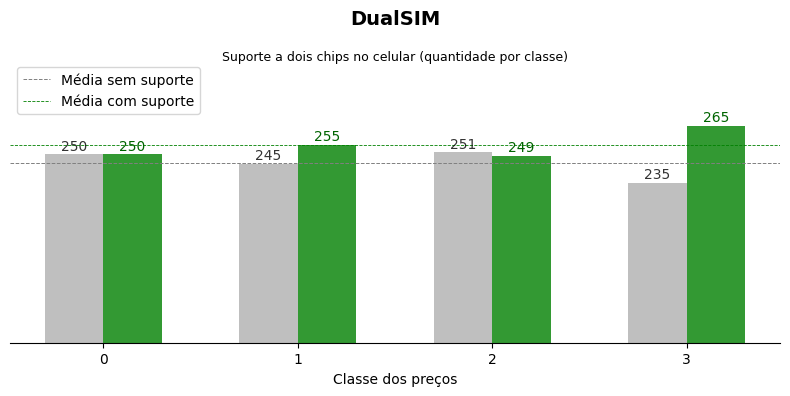

In [19]:
plot_categorica(base,
                'dual_sim',
                'price_range',
                'DualSIM',
                'Suporte a dois chips no celular (quantidade por classe)',
                salvar='dualsim')

#### **4.5. fc - Resolução da câmera frontal (MP)**

In [20]:
base.groupby("price_range")['fc'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,0,4.084,3.0,19,4.183772
1,0,4.340,3.0,18,4.499432
2,0,4.498,3.0,18,4.347390
3,0,4.316,3.0,18,4.332399


#### **4.6. four_g - Suporte a 4G**

In [21]:
base.groupby("price_range")['four_g'].value_counts()

price_range  four_g
0            1         259
             0         241
1            1         262
             0         238
2            0         253
             1         247
3            1         275
             0         225
Name: count, dtype: int64

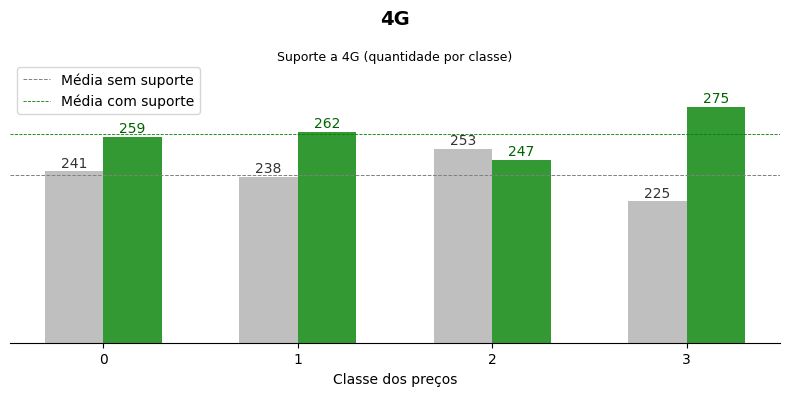

In [22]:
plot_categorica(base,
                'four_g',
                'price_range',
                '4G',
                'Suporte a 4G (quantidade por classe)',
                salvar='4g')

#### **4.7. int_memory - Memória interna (em GB)**

In [23]:
base.groupby("price_range")['int_memory'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,2,31.174,30.0,64,18.101023
1,2,32.116,32.0,64,18.000739
2,2,30.920,30.0,64,18.441958
3,2,33.976,34.5,64,17.930377


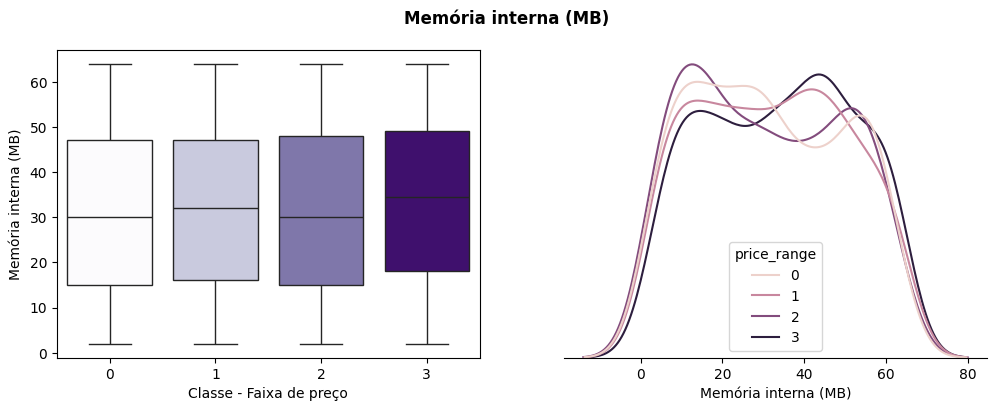

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
sns.boxplot(data=base, x='price_range', y='int_memory', hue='price_range', ax=ax[0], palette='Purples', legend=False)
sns.kdeplot(data=base, x='int_memory', hue='price_range', ax=ax[1])
ax[0].set_xlabel("Classe - Faixa de preço")
ax[0].set_ylabel("Memória interna (MB)")
ax[1].set_xlabel("Memória interna (MB)")
ax[1].yaxis.set_visible(False)
plt.suptitle("Memória interna (MB)", fontweight='bold')

ax[1].spines[['top','left','right']].set_visible(False)
plt.savefig("../images/eda_memoriainterna.png")
plt.show()

#### **4.8. m_dep - Espessura do celular**

In [25]:
base.groupby("price_range")['m_dep'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,0.1,0.4902,0.5,1.0,0.288184
1,0.1,0.5240,0.5,1.0,0.286895
2,0.1,0.4908,0.5,1.0,0.286215
3,0.1,0.5020,0.5,1.0,0.291901


#### **4.9. mobile_wt - Peso do celular em gramas**

In [26]:
base.groupby("price_range")['mobile_wt'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,80,140.552,142.0,200,36.378319
1,80,140.510,141.0,200,35.678956
2,80,143.614,145.0,200,34.320326
3,80,136.320,134.0,200,34.911994


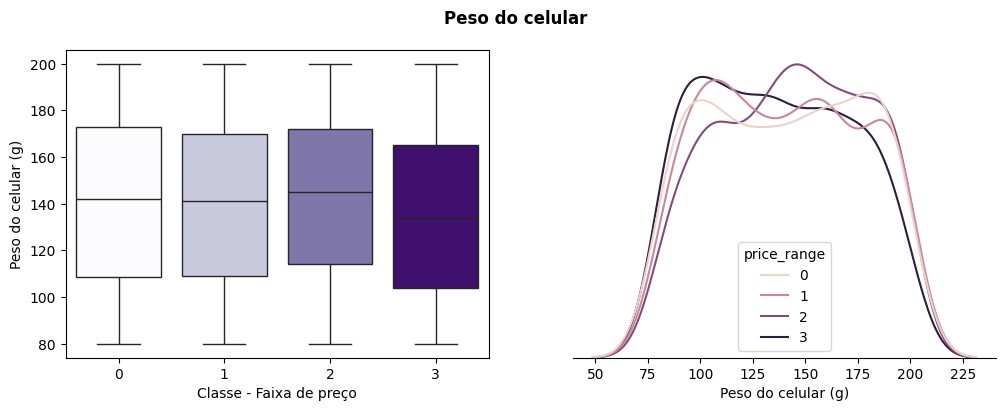

In [27]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
sns.boxplot(data=base, x='price_range', y='mobile_wt', hue='price_range', ax=ax[0], palette='Purples', legend=False)
sns.kdeplot(data=base, x='mobile_wt', hue='price_range', ax=ax[1])
ax[0].set_xlabel("Classe - Faixa de preço")
ax[0].set_ylabel("Peso do celular (g)")
ax[1].set_xlabel("Peso do celular (g)")
ax[1].yaxis.set_visible(False)
plt.suptitle("Peso do celular", fontweight='bold')

ax[1].spines[['top','left','right']].set_visible(False)
plt.savefig("../images/eda_pesocelular.png")
plt.show()

#### **4.10. n_cores - Número de núcleos do processador**

In [28]:
base.groupby("price_range")['n_cores'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,1,4.600,5.0,8,2.268544
1,1,4.298,4.0,8,2.311684
2,1,4.682,5.0,8,2.262546
3,1,4.502,5.0,8,2.297074


#### **4.11. pc - Resolução da camera traseira (MP)**

In [29]:
base.groupby("price_range")['pc'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,0,9.574,9.5,20,6.095805
1,0,9.924,10.0,20,6.124806
2,0,10.018,10.0,20,5.952861
3,0,10.150,10.0,20,6.085521


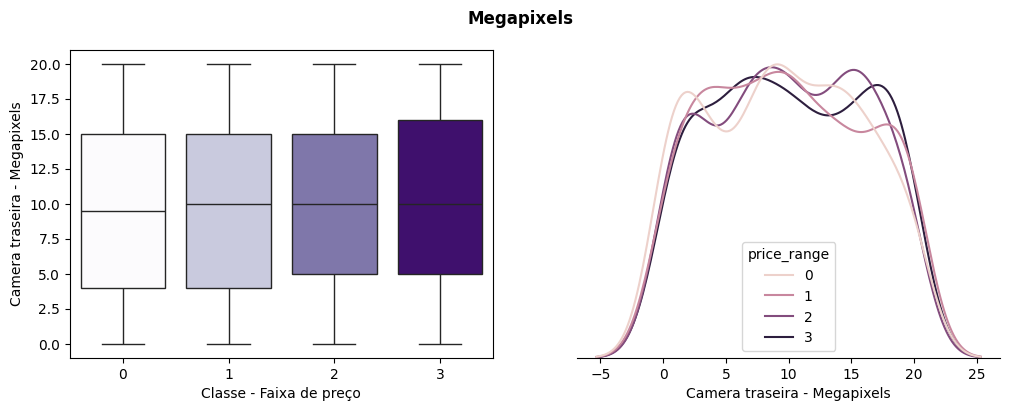

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
sns.boxplot(data=base, x='price_range', y='pc', hue='price_range', ax=ax[0], palette='Purples', legend=False)
sns.kdeplot(data=base, x='pc', hue='price_range', ax=ax[1])
ax[0].set_xlabel("Classe - Faixa de preço")
ax[0].set_ylabel("Camera traseira - Megapixels")
ax[1].set_xlabel("Camera traseira - Megapixels")
ax[1].yaxis.set_visible(False)
plt.suptitle("Megapixels", fontweight='bold')

ax[1].spines[['top','left','right']].set_visible(False)

plt.savefig("../images/eda_cameratraseira.png")
plt.show()

#### **4.12. px_height - Altura da resolução da tela em pixels**

In [31]:
base.groupby("price_range")['px_height'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,1,536.408,465.5,1878,372.824164
1,0,666.892,606.0,1914,441.351209
2,10,632.284,538.5,1960,445.789232
3,0,744.848,674.0,1949,483.720179


#### **4.13. px_width - Largura da resolução da tela em pixels**

In [32]:
base.groupby("price_range")['px_width'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,500,1150.270,1132.5,1989,413.001780
1,500,1251.908,1223.0,1998,433.564352
2,508,1234.046,1221.5,1997,427.757151
3,501,1369.838,1415.5,1995,426.823571


#### **4.14. RAM**

In [33]:
base.groupby("price_range")['ram'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,256,785.314,719.5,1974,362.755397
1,387,1679.490,1686.5,2811,465.850159
2,1185,2582.816,2577.0,3916,496.211735
3,2259,3449.232,3509.5,3998,393.019923


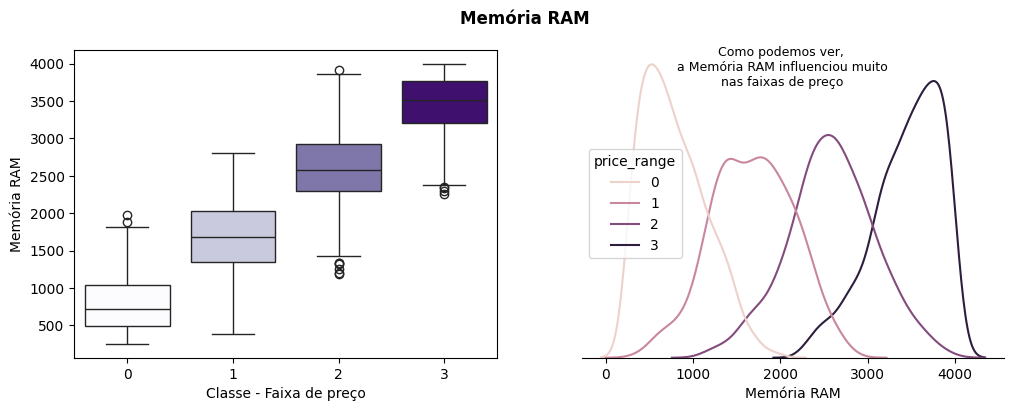

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
sns.boxplot(data=base, x='price_range', y='ram', hue='price_range', ax=ax[0], palette='Purples', legend=False)
sns.kdeplot(data=base, x='ram', hue='price_range', ax=ax[1])
ax[0].set_xlabel("Classe - Faixa de preço")
ax[0].set_ylabel("Memória RAM")
ax[1].set_xlabel("Memória RAM")
ax[1].yaxis.set_visible(False)
plt.suptitle("Memória RAM", fontweight='bold')

ax[1].spines[['top','left','right']].set_visible(False)
ax[1].text(2000, 0.00025, "Como podemos ver,\n a Memória RAM influenciou muito\n nas faixas de preço", ha='center', fontsize=9)
plt.savefig("../images/eda_ram.png")
plt.show()

#### **4.15. sc_h - Altura do corpo do celular (cm)**

In [35]:
base.groupby("price_range")['sc_h'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,5,12.324,12.0,19,4.206949
1,5,12.212,12.0,19,4.226913
2,5,12.010,12.0,19,4.234355
3,5,12.680,13.0,19,4.168976


#### **4.16. sc_w - Largura do corpo do celular (cm)**

In [36]:
base.groupby("price_range")['sc_w'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,0,5.682,5.0,18,4.174173
1,0,5.544,5.0,18,4.238868
2,0,5.714,5.0,17,4.265747
3,0,6.128,5.0,18,4.716790


#### **4.17. talk_time - Tempo máximo de conversação em carga cheia (horas)**

In [37]:
base.groupby("price_range")['talk_time'].agg(['min','mean','median','max','std'])

,min,mean,median,max,std
price_range,,,,,
0,2,10.612,10.0,20,5.397009
1,2,11.362,12.0,20,5.570729
2,2,10.972,11.0,20,5.433070
3,2,11.098,11.0,20,5.443129


#### **4.18. three_g - Se o celular suporta 3G**

In [38]:
base.groupby("price_range")['three_g'].value_counts()

price_range  three_g
0            1          373
             0          127
1            1          378
             0          122
2            1          387
             0          113
3            1          385
             0          115
Name: count, dtype: int64

#### **4.19. touch_screen - Se possui tela sensível ao toque**

In [39]:
base.groupby("price_range")['touch_screen'].value_counts()

price_range  touch_screen
0            1               262
             0               238
1            1               261
             0               239
2            0               265
             1               235
3            0               252
             1               248
Name: count, dtype: int64

#### **4.20. Wifi**

In [40]:
base.groupby("price_range")['wifi'].value_counts()

price_range  wifi
0            0       252
             1       248
1            1       252
             0       248
2            1       252
             0       248
3            1       262
             0       238
Name: count, dtype: int64